In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [36]:
import pandas as pd
import random

# Sample values for each column
genders = ["male", "female"]
races = ["group A", "group B", "group C", "group D", "group E"]
education_levels = [
    "high school", "some high school", "associate's degree",
    "bachelor's degree", "master's degree", "some college"
]
lunch_types = ["standard", "free/reduced"]
prep_courses = ["none", "completed"]

# Generate 99 valid rows
data = []
for _ in range(500):
    data.append({
        "gender": random.choice(genders),
        "race_ethnicity": random.choice(races),
        "parental_level_of_education": random.choice(education_levels),
        "lunch": random.choice(lunch_types),
        "test_preparation_course": random.choice(prep_courses),
        "math_score": random.randint(0, 100),
        "reading_score": random.randint(0, 100),
        "writing_score": random.randint(0, 100)
    })

# Add 1 row (row 100) with an intentional error — for example, a string in math_score
data.append({
    "gender": "female",
    "race_ethnicity": "group B",
    "parental_level_of_education": "master's degree",
    "lunch": "standard",
    "test_preparation_course": "completed",
    "math_score": 90,  # <- intentional exception (should be numeric)
    "reading_score": 88,
    "writing_score": 92
})

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("student_scores_with_exception.csv", index=False)

print("CSV file with 500 rows (including an exception in row 500) saved.")


CSV file with 500 rows (including an exception in row 500) saved.


In [37]:
df.shape

(501, 8)

In [39]:
# Check Missing values
# Check Duplicates
# Check data type
# Check the number of unique values of each column
# Check statistics of data set
# Check various categories present in the different categorical column

In [40]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       501 non-null    object
 1   race_ethnicity               501 non-null    object
 2   parental_level_of_education  501 non-null    object
 3   lunch                        501 non-null    object
 4   test_preparation_course      501 non-null    object
 5   math_score                   501 non-null    int64 
 6   reading_score                501 non-null    int64 
 7   writing_score                501 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 31.4+ KB


In [43]:
df.nunique()

gender                           2
race_ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                     101
reading_score                  100
writing_score                  100
dtype: int64

In [44]:
df.describe()

,math_score,reading_score,writing_score
count,501.000000,501.000000,501.000000
mean,49.906188,51.101796,51.750499
std,29.099505,28.723712,29.259659
min,0.000000,0.000000,0.000000
25%,23.000000,27.000000,28.000000
50%,50.000000,51.000000,53.000000
75%,74.000000,76.000000,76.000000
max,100.000000,100.000000,100.000000


In [45]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group E,some high school,free/reduced,none,37,10,55
1,female,group B,some high school,standard,none,25,34,6
2,male,group B,high school,standard,completed,39,60,94
3,male,group C,master's degree,free/reduced,completed,9,29,49
4,male,group A,bachelor's degree,free/reduced,completed,16,62,33


In [46]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group E' 'group B' 'group C' 'group A' 'group D']
Categories in'parental level of education' variable: ['some high school' 'high school' "master's degree" "bachelor's degree"
 "associate's degree" 'some college']
Categories in 'lunch' variable:      ['free/reduced' 'standard']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [47]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [48]:
#  Adding columns for "Total Score" and "Average"

df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group E,some high school,free/reduced,none,37,10,55,102,34.000000
1,female,group B,some high school,standard,none,25,34,6,65,21.666667
2,male,group B,high school,standard,completed,39,60,94,193,64.333333
3,male,group C,master's degree,free/reduced,completed,9,29,49,87,29.000000
4,male,group A,bachelor's degree,free/reduced,completed,16,62,33,111,37.000000


In [49]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 3
Number of students with full marks in Writing: 1
Number of students with full marks in Reading: 6


In [50]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 107
Number of students with less than 20 marks in Writing: 94
Number of students with less than 20 marks in Reading: 96


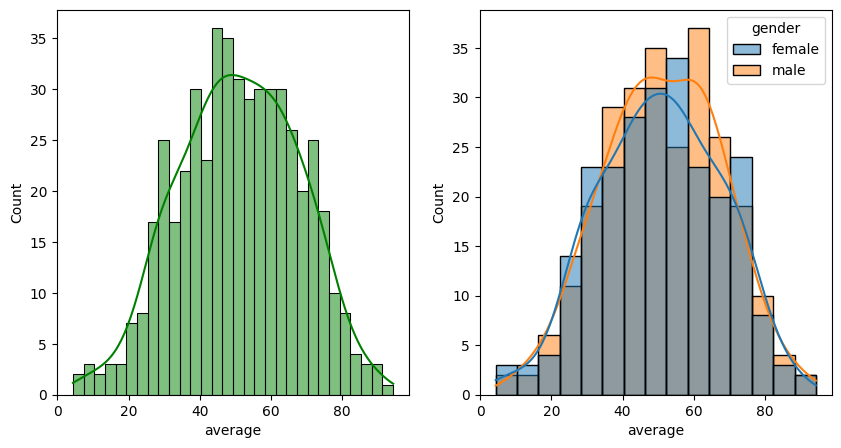

In [56]:
# Exploring Data ( Visualization )
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

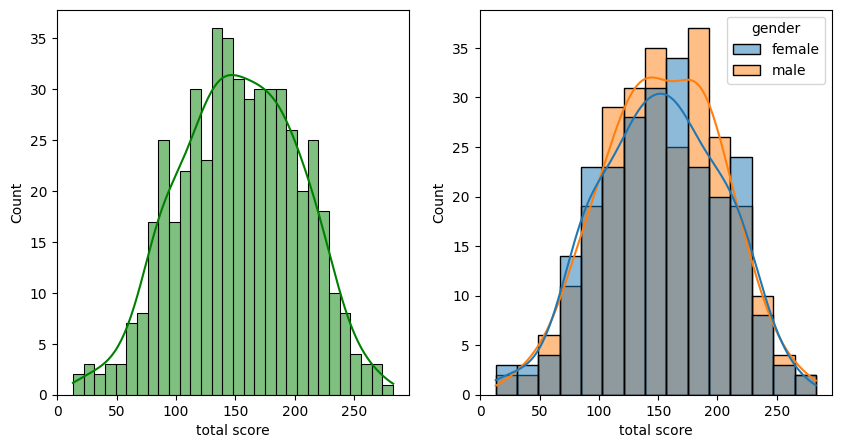

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

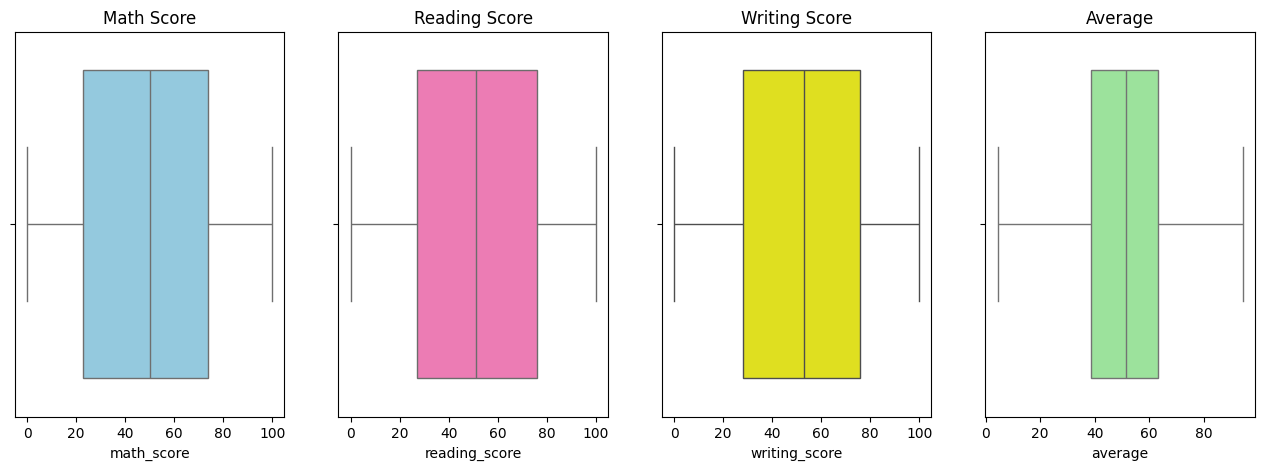

In [65]:
# check outlier
plt.subplots(1, 4, figsize=(16, 5))
plt.subplot(141)
sns.boxplot(x=df['math_score'], color='skyblue')
plt.title('Math Score')
plt.subplot(142)
sns.boxplot(x=df['reading_score'], color='hotpink')
plt.title('Reading Score')
plt.subplot(143)
sns.boxplot(x=df['writing_score'], color='yellow')
plt.title('Writing Score')
plt.subplot(144)
sns.boxplot(x=df['average'], color='lightgreen')
plt.title('Average')
plt.show()

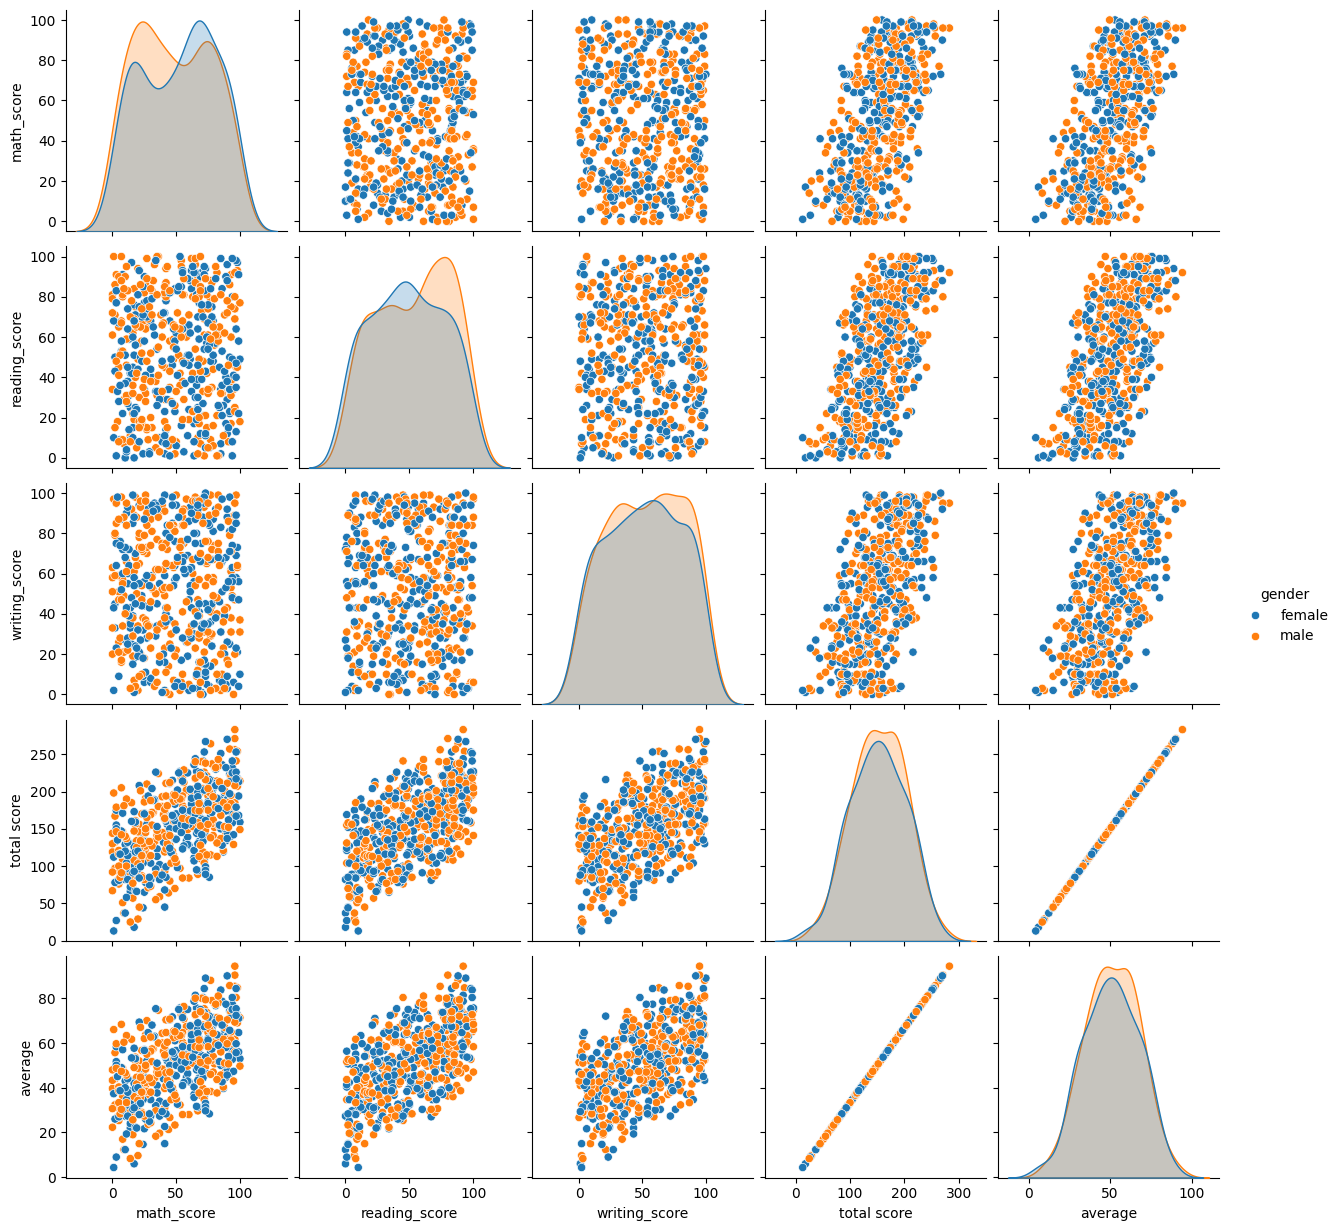

In [66]:
sns.pairplot(df,hue = 'gender')
plt.show()